### case study 1 ex10

In [1]:
# Case Study-1
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import re
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

train = pd.read_csv("nlptrain.csv")
test = pd.read_csv("nlptest.csv")
print(train.head())
print(test.head())

   id  label                                              tweet
0   1      0  #fingerprint #Pregnancy Test https://goo.gl/h1...
1   2      0  Finally a transparant silicon case ^^ Thanks t...
2   3      0  We love this! Would you go? #talk #makememorie...
3   4      0  I'm wired I know I'm George I was made that wa...
4   5      1  What amazing service! Apple won't even talk to...
     id                                              tweet
0  7921  I hate the new #iphone upgrade. Won't let me d...
1  7922  currently shitting my fucking pants. #apple #i...
2  7923  I'd like to puts some CD-ROMS on my iPad, is t...
3  7924  My ipod is officially dead. I lost all my pict...
4  7925  Been fighting iTunes all night! I only want th...


In [2]:
# creating a combined df
tweet_df = pd.concat([train, test])
tweet_df.head()

,id,label,tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...
3,4,0.0,I'm wired I know I'm George I was made that wa...
4,5,1.0,What amazing service! Apple won't even talk to...


In [3]:
# EDA
print("shape of train_set:",train.shape)
print("shape of test_set:",test.shape)
print("shape of combined df:",tweet_df.shape)
print(tweet_df.describe())
print(tweet_df.dtypes)

shape of train_set: (7920, 3)
shape of test_set: (1953, 2)
shape of combined df: (9873, 3)
                id        label
count  9873.000000  7920.000000
mean   4937.000000     0.255808
std    2850.233938     0.436342
min       1.000000     0.000000
25%    2469.000000     0.000000
50%    4937.000000     0.000000
75%    7405.000000     1.000000
max    9873.000000     1.000000
id         int64
label    float64
tweet     object
dtype: object


In [4]:
tweet_df.isnull().sum()

id          0
label    1953
tweet       0
dtype: int64

In [5]:
# checking unique labels and their count
tweet_df['label'].value_counts()

label
0.0    5894
1.0    2026
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

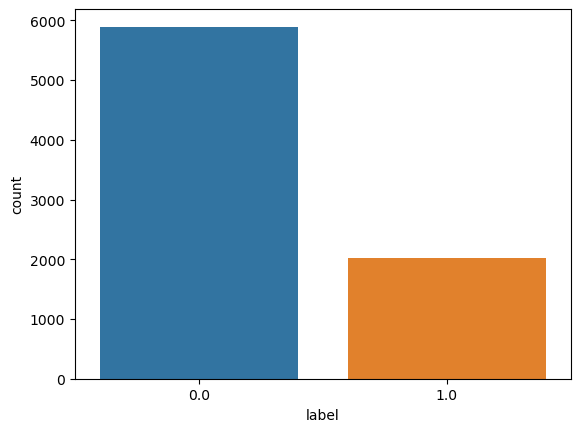

In [6]:
# plotting the unique labels
sns.countplot(x='label', data=tweet_df)

In [7]:
# Cleaning Raw tweets
def clean_text(text):
    #remove emails
    text = ' '.join([i for i in text.split() if '@' not in i])
    #remove web address ? Means matching anything to its left \S all non white space characters
    text = re.sub('http[s]?://\S+', '', text)
    #Filter to allow only alphabets
    text = re.sub(r'[^a-zA-Z\']', ' ', text)
    #Remove Unicode characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    #Convert to lowercase to maintain consistency
    text = text.lower()
    #remove double spaces
    text = re.sub('\s+', ' ',text)
    return text
tweet_df["clean_tweet"] = tweet_df.tweet.apply(lambda x: clean_text(x))

STOP_WORDS = ['a', 'about', 'above', 'after', 'again', 'against', 'all','also', 'am', 'an', 'and','any', 'are',
"aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below','between', 'both', 'but', 'by', 'can',
"can't", 'cannot', 'com', 'could', "couldn't", 'did',"didn't", 'do', 'does', "doesn't", 'doing', "don't",
'down', 'during', 'each', 'else', 'ever','few', 'for', 'from', 'further', 'get', 'had', "hadn't", 'has',"hasn't",
'have', "haven't", 'having','he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers', 'herself', 'him',
'himself', 'his', 'how',"how's", 'however', 'http', 'i', "i'd", "i'll", "i'm", "i've",'if', 'in', 'into', 'is', "isn't",
'it',"it's", 'its', 'itself', 'just', 'k', "let's", 'like', 'me','more', 'most', "mustn't", 'my', 'myself','no', 'nor',
'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'otherwise', 'ought', 'our', 'ours', 'ourselves', 'out', 'over',
'own', 'r', 'same', 'shall',"shan't", 'she', "she'd", "she'll", "she's",'should', "shouldn't", 'since', 'so',
'some', 'such', 'than', 'that', "that's", 'the', 'their', 'theirs','them', 'themselves', 'then', 'there', "there's",
'these','they', "they'd", "they'll", "they're","they've", 'this', 'those', 'through', 'to', 'too', 'under','until',
'up', 'very', 'was', "wasn't",'we', "we'd", "we'll", "we're", "we've", 'were', "weren't",'what', "what's",
'when', "when's", 'where',"where's", 'which', 'while', 'who', "who's", 'whom', 'why',"why's", 'with',
"won't", 'would', "wouldn't",'www', 'you', "you'd", "you'll", "you're", "you've", 'your','yours',
'yourself', 'yourselves']

In [8]:
# Remove stopwords from all the tweets
tweet_df['cleaned_tweet'] = tweet_df['clean_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (STOP_WORDS)]))

# Adding New feature length of Tweet
tweet_df['word_count']=tweet_df.cleaned_tweet.str.split().apply(lambda x: len(x))
ndf=tweet_df.copy()
ndf = ndf.drop(['tweet','clean_tweet','word_count'], axis = 1)

# Seperating Train and Test Set
train_set = ndf[~ndf.label.isnull()]
test_set = ndf[ndf.label.isnull()]
print(train_set.head())
print("--------------------------------------------------------------")
print(test_set.head())

   id  label                                      cleaned_tweet
0   1    0.0  fingerprint pregnancy test android apps beauti...
1   2    0.0  finally transparant silicon case thanks uncle ...
2   3    0.0  love go talk makememories unplug relax iphone ...
3   4    0.0  wired know george made way iphone cute daventr...
4   5    1.0  amazing service apple even talk question unles...
--------------------------------------------------------------
     id  label                                      cleaned_tweet
0  7921    NaN  hate new iphone upgrade let download apps ugh ...
1  7922    NaN  currently shitting fucking pants apple imac ca...
2  7923    NaN      puts cd roms ipad possible ' yes block screen
3  7924    NaN  ipod officially dead lost pictures videos d so...
4  7925    NaN              fighting itunes night want music paid


In [9]:
# removing target column from test_set
test_set = test_set.drop('label', axis=1)

In [10]:
# Defining X and y
X = train_set.drop('label', axis=1)
y = train_set.label

X = X['cleaned_tweet'].astype(str)
# Train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(6336,) (1584,) (6336,) (1584,)


In [11]:
# vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
vect.fit(x_train)

x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [12]:
# Model training
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score
model = RFC(n_estimators=200)
model.fit(x_train_dtm,y_train)
y_pred = model.predict(x_test_dtm)
print("Accuracy : ",accuracy_score(y_test,y_pred)*100,"%")

Accuracy :  86.9949494949495 %


In [13]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix= cnf_matrix / cnf_matrix.astype(np.float64).sum(axis=1)
# Plot normalized confusion matrix
print(cnf_matrix)

# Evaluation Metrics
from sklearn.metrics import classification_report
class_names = ['Not Negative','Negative']
eval_metrics = classification_report(y_test, y_pred, target_names=class_names)
print(eval_metrics)

[[0.95746528 0.11342593]
 [0.13628472 0.63657407]]
              precision    recall  f1-score   support

Not Negative       0.88      0.96      0.91      1152
    Negative       0.85      0.64      0.73       432

    accuracy                           0.87      1584
   macro avg       0.86      0.80      0.82      1584
weighted avg       0.87      0.87      0.86      1584



In [14]:
## or take this code for google drive
## check hastags

In [15]:
##from google.colab import drive
##drive.mount('/content/drive/')
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import re
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import re
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
##%cd drive
##%cd MyDrive/Identify-the-Sentiments-master
# reading dataset
train = pd.read_csv('nlptrain.csv')
test = pd.read_csv('nlptest.csv')
# concatenating both datasets
df = pd.concat([train, test])
df.head()

,id,label,tweet
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...
2,3,0.0,We love this! Would you go? #talk #makememorie...
3,4,0.0,I'm wired I know I'm George I was made that wa...
4,5,1.0,What amazing service! Apple won't even talk to...


(7920, 3) (1953, 2) (9873, 3)


<Axes: xlabel='label', ylabel='count'>

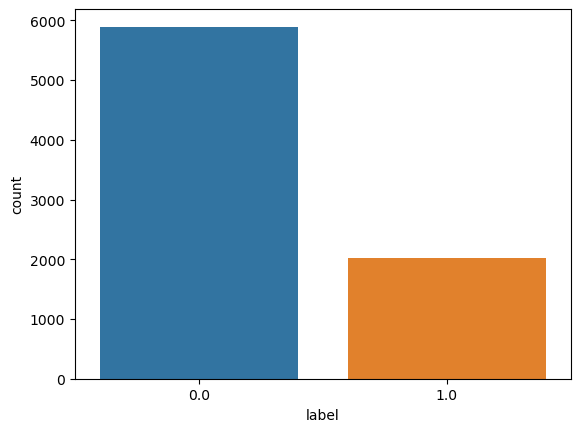

In [16]:
# checking for shape
print(train.shape, test.shape, df.shape)
df.describe()
# checking dtypes
df.dtypes
df.isnull().sum()
# Checking unique labels
df['label'].value_counts()
# Ploting unique labels
sns.countplot(x='label', data=df)

In [17]:
# Cleaning Raw tweets
def clean_text(text):
        #remove emails
        text = ' '.join([i for i in text.split() if '@' not in i])
        #remove web address ? Means matching anything to its left \S all non white space characters
        text = re.sub('http[s]?://\S+', '', text)
        #Filter to allow only alphabets
        text = re.sub(r'[^a-zA-Z\']', ' ', text)
        #Remove Unicode characters
        text = re.sub(r'[^\x00-\x7F]+', '', text)
        #Convert to lowercase to maintain consistency
        text = text.lower()
        #remove double spaces
        text = re.sub('\s+', ' ',text)
        return text
df["clean_tweet"] = df.tweet.apply(lambda x: clean_text(x))

In [18]:
STOP_WORDS = ['a', 'about', 'above', 'after', 'again', 'against', 'all','also', 'am', 'an', 'and','any', 'are',
"aren't", 'as', 'at', 'be', 'because', 'been','before', 'being', 'below','between', 'both', 'but', 'by', 'can',
"can't", 'cannot', 'com','could', "couldn't", 'did',"didn't", 'do', 'does', "doesn't", 'doing', "don't",
'down', 'during', 'each', 'else', 'ever','few', 'for', 'from', 'further', 'get', 'had', "hadn't", 'has',"hasn't",
'have', "haven't", 'having','he', "he'd", "he'll", "he's", 'her', 'here', "here's", 'hers','herself', 'him',
'himself', 'his', 'how',"how's", 'however', 'http', 'i', "i'd", "i'll", "i'm", "i've",'if', 'in', 'into', 'is', "isn't",
'it',"it's", 'its', 'itself', 'just', 'k', "let's", 'like', 'me','more', 'most', "mustn't", 'my', 'myself','no', 'nor',
'not', 'of', 'off', 'on', 'once', 'only', 'or','other', 'otherwise','ought', 'our', 'ours','ourselves', 'out', 'over',
'own', 'r', 'same', 'shall',"shan't", 'she', "she'd", "she'll", "she's",'should', "shouldn't", 'since', 'so',
'some', 'such', 'than','that', "that's", 'the', 'their', 'theirs','them', 'themselves', 'then', 'there', "there's",
'these','they', "they'd", "they'll", "they're","they've", 'this', 'those', 'through', 'to', 'too', 'under','until',
'up', 'very', 'was', "wasn't",'we', "we'd", "we'll", "we're", "we've", 'were', "weren't",'what', "what's",
'when', "when's", 'where',"where's", 'which', 'while', 'who', "who's", 'whom', 'why',"why's", 'with',
"won't", 'would', "wouldn't",'www', 'you', "you'd", "you'll", "you're", "you've", 'your','yours',
'yourself', 'yourselves']

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Assuming STOP_WORDS is defined elsewhere
# Remove stopwords from all the tweets
df['cleaned_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in STOP_WORDS]))

# Adding new feature length of Tweet
df['word_count'] = df.cleaned_tweet.str.split().apply(lambda x: len(x))

# Copy DataFrame and drop unnecessary columns
ndf = df.copy()
ndf = ndf.drop(['tweet', 'clean_tweet', 'word_count'], axis=1)

# Separating Train and Test Set
train_set = ndf[~ndf.label.isnull()]
test_set = ndf[ndf.label.isnull()]  # Assuming test_set is the remaining rows without labels

# Print shapes of train and test sets
print(train_set.shape, test_set.shape)

# Defining X and y
X = train_set.drop(['label'], axis=1)
y = train_set.label

# Dropping target column from test set
test_set = test_set.drop(['label'], axis=1)

# Cast cleaned_tweet to string
X = X['cleaned_tweet'].astype(str)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Vectorizing the text data
vect = CountVectorizer()
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)
X_test_dtm = vect.transform(X_test)

# Model training and prediction
model = RandomForestClassifier(n_estimators=200)
model.fit(X_train_dtm, y_train)
rf = model.predict(X_test_dtm)
print("Accuracy:", accuracy_score(y_test, rf) * 100, "%")

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, rf)
cnf_matrix = cnf_matrix / cnf_matrix.astype(np.float64).sum(axis=1, keepdims=True)
class_names = ['Not Negative', 'Negative']

# Print normalized confusion matrix
print(cnf_matrix)

# Classification report
eval_metrics = classification_report(y_test, rf, target_names=class_names)
print(eval_metrics)


(7920, 3) (1953, 3)
(5544,) (2376,) (5544,) (2376,)
Accuracy: 86.32154882154882 %
[[0.9529745  0.0470255 ]
 [0.39607201 0.60392799]]
              precision    recall  f1-score   support

Not Negative       0.87      0.95      0.91      1765
    Negative       0.82      0.60      0.69       611

    accuracy                           0.86      2376
   macro avg       0.85      0.78      0.80      2376
weighted avg       0.86      0.86      0.86      2376

